<div class="alert alert-block alert-info">

[1. Import](#1st-bullet)<br>
- [1.1 Import libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
 
[2. Data Exploration](#4th-bullet)<br>
- [2.1 Coeherence Check](#5th-bullet)<br>
- [2.2 Outliers](#6th-bullet)<br>   
    - [2.2.1 Manual Filter](#7th-bullet)<br>
    - [2.2.2 IQR method](#8th-bullet)<br>
    - [2.2.3 Multi-dimentional outliers](#8th-bullet)<br>
- [2.3 Scale the data](#9th-bullet)<br>
- [2.4 Missing Values](#10th-bullet)<br>
    - [2.4.1 KNN](#11th-bullet)<br>
    - [2.4.2 Median, Mode](#12th-bullet)<br>
- [2.5 Feature Engineering](#13th-bullet)<br>
- [2.6 Scale the data](#14th-bullet)<br>
- [2.7 Feature Selection](#15th-bullet)<br>
      


</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Import
       
</div>

<a class="anchor" id="2nd-bullet">

### 1.1. Import libraries
    
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport
import os

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Seeting seaborn style
sns.set()

In [2]:
import pyreadstat

<a class="anchor" id="3rd-bullet">

### 1.1. Import dataset
    
</a>

In [162]:
data, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [163]:
# DM_profiling_report = ProfileReport(data, title="DM Pandas Profiling Report", explorative=True)
# DM_profiling_report.to_notebook_iframe()

In [164]:
#DM_profiling_report.to_file("DM_profiling_report.html")

<div class="alert alert-block alert-success">

<a class="anchor" id="4rd-bullet">    </a>
## 1. Data Exploration
       
</div>

In [165]:
data

CustID  FirstPolYear  BirthYear          EducDeg  MonthSal  \
0          1.0        1985.0     1982.0  2 - High School    2177.0   
1          2.0        1981.0     1995.0  2 - High School     677.0   
2          3.0        1991.0     1970.0        1 - Basic    2277.0   
3          4.0        1990.0     1981.0      3 - BSc/MSc    1099.0   
4          5.0        1986.0     1973.0      3 - BSc/MSc    1763.0   
...        ...           ...        ...              ...       ...   
10291  10292.0        1984.0     1949.0          4 - PhD    3188.0   
10292  10293.0        1977.0     1952.0        1 - Basic    2431.0   
10293  10294.0        1994.0     1976.0      3 - BSc/MSc    2918.0   
10294  10295.0        1981.0     1977.0        1 - Basic    1971.0   
10295  10296.0        1990.0     1981.0          4 - PhD    2815.0   

       GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
0             1.0       1.0      380.97        0.39     375.85          79.45   
1             4.0       1.0     -131.13        1.12      77.46         416.20   
2             3.0       0.0      504.67        0.28     206.15         224.50   
3             4.0       1.0      -16.99        0.99     182.48          43.35   
4             4.0       1.0       35.23        0.90     338.62          47.80   
...           ...       ...         ...         ...        ...            ...   
10291         2.0       0.0       -0.11        0.96     393.74          49.45   
10292         3.0       0.0     1405.60        0.00     133.58        1035.75   
10293         1.0       1.0      524.10        0.21     403.63         132.80   
10294         2.0       1.0      250.05        0.65     188.59         211.15   
10295         1.0       1.0      463.75        0.27     414.08          94.45   

       PremHealth  PremLife  PremWork  
0          146.36     47.01     16.89  
1          116.69    194.48    106.13  
2          124.58     86.35     99.02  
3          311.17     35.34     28.34  
4          182.59     18.78     41.45  
...           ...       ...       ...  
10291      173.81      9.78     14.78  
10292      143.25     12.89    105.13  
10293      142.25     12.67      4.89  
10294      198.37     63.90    112.91  
10295      141.25      6.89     12.89  

[10296 rows x 14 columns]

In [166]:
data.set_index('CustID',inplace=True)

In [167]:
data.describe().T

count         mean          std        min      25%      50%  \
FirstPolYear   10266.0  1991.062634   511.267913    1974.00  1980.00  1986.00   
BirthYear      10279.0  1968.007783    19.709476    1028.00  1953.00  1968.00   
MonthSal       10260.0  2506.667057  1157.449634     333.00  1706.00  2501.50   
GeoLivArea     10295.0     2.709859     1.266291       1.00     1.00     3.00   
Children       10275.0     0.706764     0.455268       0.00     0.00     1.00   
CustMonVal     10296.0   177.892605  1945.811505 -165680.42    -9.44   186.87   
ClaimsRate     10296.0     0.742772     2.916964       0.00     0.39     0.72   
PremMotor      10262.0   300.470252   211.914997      -4.11   190.59   298.61   
PremHousehold  10296.0   210.431192   352.595984     -75.00    49.45   132.80   
PremHealth     10253.0   171.580833   296.405976      -2.11   111.80   162.81   
PremLife       10192.0    41.855782    47.480632      -7.00     9.89    25.56   
PremWork       10210.0    41.277514    51.513572     -12.00    10.67    25.67   

                     75%       max  
FirstPolYear   1992.0000  53784.00  
BirthYear      1983.0000   2001.00  
MonthSal       3290.2500  55215.00  
GeoLivArea        4.0000      4.00  
Children          1.0000      1.00  
CustMonVal      399.7775  11875.89  
ClaimsRate        0.9800    256.20  
PremMotor       408.3000  11604.42  
PremHousehold   290.0500  25048.80  
PremHealth      219.8200  28272.00  
PremLife         57.7900    398.30  
PremWork         56.7900   1988.70

In [168]:
data[data['EducDeg']==''].sample()

FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                    
2450.0           NaN     1939.0            4465.0         4.0       0.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
2450.0      457.75        0.36     338.73         187.25      175.81   

        PremLife  PremWork  
CustID                      
2450.0     43.23      4.78

In [169]:
# replace "" by nans
maybe_nan=['_','',' ','  ','/','%']
data.replace(maybe_nan, np.nan, inplace=True)

# count of missing values
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [170]:
data.insert(4,'EducDeg_cat',data['EducDeg'].str[4:])

In [171]:
data.insert(4,'EducDeg_ord',data['EducDeg'].str[0])

In [172]:
data.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
EducDeg_ord       object
EducDeg_cat       object
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [173]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [174]:
# pd.Int32Dtype() due to nan values
data['FirstPolYear']=data['FirstPolYear'].astype(pd.Int32Dtype())
data['BirthYear']=data['BirthYear'].astype(pd.Int32Dtype())
data['Children']=data['Children'].astype(pd.Int32Dtype())
data['GeoLivArea']=data['GeoLivArea'].astype(pd.Int32Dtype())
data['CustMonVal']=data['CustMonVal'].astype(pd.Float32Dtype())
data['ClaimsRate']=data['ClaimsRate'].astype(pd.Float32Dtype())
data['PremMotor']=data['PremMotor'].astype(pd.Float32Dtype())
data['PremHousehold']=data['PremHousehold'].astype(pd.Float32Dtype())
data['PremHealth']=data['PremHealth'].astype(pd.Float32Dtype())
data['PremLife']=data['PremLife'].astype(pd.Float32Dtype())
data['PremWork']=data['PremWork'].astype(pd.Float32Dtype())

data['EducDeg_cat']=data['EducDeg_cat'].astype(pd.StringDtype())

data['EducDeg_ord'] = data['EducDeg_ord'].astype('float').astype('Int32')


In [175]:
data.dtypes

FirstPolYear       Int32
BirthYear          Int32
EducDeg           object
MonthSal         float64
EducDeg_ord        Int32
EducDeg_cat       string
GeoLivArea         Int32
Children           Int32
CustMonVal       Float32
ClaimsRate       Float32
PremMotor        Float32
PremHousehold    Float32
PremHealth       Float32
PremLife         Float32
PremWork         Float32
dtype: object

In [176]:
# Check for duplicated rows
data[data.duplicated()]#.sum()
# dropping all duplicates
data.drop_duplicates(inplace=True)

In [177]:
data

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10293 rows x 15 columns]

In [178]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [179]:
17+30+21+17

85

In [180]:
data_treat=data.copy()

In [181]:
data

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10293 rows x 15 columns]

<a class="anchor" id="5th-bullet">

### 2.1. Coeherence Check
    
</a>

In [182]:
# checking if the correspondance is done well
data[
         ((data['EducDeg_cat']=='PhD') & (data['EducDeg_ord']==4))|
          ((data['EducDeg_cat']=='Basic') & (data['EducDeg_ord']==1))|
          ((data['EducDeg_cat']=='High School') & (data['EducDeg_ord']==2))|
          ((data['EducDeg_cat']=='BSc/MSc') & (data['EducDeg_ord']==3))]

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10276 rows x 15 columns]

In [183]:
# the missing records are due to nan
10293-10276

17

In [184]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [185]:
data=data[    ((data['BirthYear']<=2016) | (data['BirthYear'].isnull()))&
         ((data['BirthYear']>=2016-120)|(data['BirthYear'].isnull()))&
         ((data['FirstPolYear']<=2016) |(data['FirstPolYear'].isnull()))&
         ((data['FirstPolYear']>=2016-120)|(data['FirstPolYear'].isnull()))&
         ((data['FirstPolYear']>=data['BirthYear'])|(data['FirstPolYear'].isnull())|(data['BirthYear'].isnull()))&
#         ((data['PremMotor']>0) & (data['BirthYear']>(2016-18)))|
#         ((data['PremWork']>0) & (data['BirthYear']>(2016-18)))|
#         ((data['PremHousehold']>0) & (data['BirthYear']>(2016-18)))|
        # cuidado com os nan FirstPolYear
        
#          ((data['Children']==1) & (data['BirthYear']<=(2016-11)))|
#          ((data['EducDeg']=='4 - PhD') & (data['BirthYear']<=(2016-13)))|

         (((data['EducDeg_cat']=='PhD') & (data['EducDeg_ord']==4))|
          ((data['EducDeg_cat']=='Basic') & (data['EducDeg_ord']==1))|
          ((data['EducDeg_cat']=='High School') & (data['EducDeg_ord']==2))|
          ((data['EducDeg_cat']=='BSc/MSc') & (data['EducDeg_ord']==3)))
      ]

In [186]:
data

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
6.0              1986       1956  2 - High School    2566.0            2   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
6.0      High School           4         1       -24.33         1.0   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth   PremLife    PremWork  
CustID                                                                 
1.0      375.850006      79.449997  146.360001  47.009998   16.889999  
3.0      206.149994          224.5  124.580002  86.349998   99.019997  
4.0      182.479996      43.349998  311.170013      35.34       28.34  
5.0      338.619995      47.799999  182.589996  18.780001   41.450001  
6.0          440.75           18.9  114.800003        7.0        7.67  
...             ...            ...         ...        ...         ...  
10292.0   393.73999      49.450001  173.809998       9.78       14.78  
10293.0  133.580002        1035.75      143.25      12.89  105.129997  
10294.0  403.630005     132.800003      142.25      12.67        4.89  
10295.0  188.589996     211.149994  198.369995  63.900002  112.910004  
10296.0  414.079987      94.449997      141.25       6.89       12.89  

[8278 rows x 15 columns]

In [187]:
# percentage of inconsistent records
(1-(8294/10293))*100

19.42096570484796

In [188]:
data_consist=data.copy()

In [189]:
data.isna().sum()

FirstPolYear     15
BirthYear        17
EducDeg           0
MonthSal         24
EducDeg_ord       0
EducDeg_cat       0
GeoLivArea        1
Children         18
CustMonVal        0
ClaimsRate        0
PremMotor        26
PremHousehold     0
PremHealth       30
PremLife         92
PremWork         69
dtype: int64

In [190]:
# redundant variables
data.drop(['EducDeg_cat', 'EducDeg'], axis=1, inplace=True)

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [191]:
data

FirstPolYear  BirthYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                                          
1.0              1985       1982    2177.0            2           1         1   
3.0              1991       1970    2277.0            1           3         0   
4.0              1990       1981    1099.0            3           4         1   
5.0              1986       1973    1763.0            3           4         1   
6.0              1986       1956    2566.0            2           4         1   
...               ...        ...       ...          ...         ...       ...   
10292.0          1984       1949    3188.0            4           2         0   
10293.0          1977       1952    2431.0            1           3         0   
10294.0          1994       1976    2918.0            3           1         1   
10295.0          1981       1977    1971.0            1           2         1   
10296.0          1990       1981    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
6.0           -24.33         1.0      440.75           18.9  114.800003   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

          PremLife    PremWork  
CustID                          
1.0      47.009998   16.889999  
3.0      86.349998   99.019997  
4.0          35.34       28.34  
5.0      18.780001   41.450001  
6.0            7.0        7.67  
...            ...         ...  
10292.0       9.78       14.78  
10293.0      12.89  105.129997  
10294.0      12.67        4.89  
10295.0  63.900002  112.910004  
10296.0       6.89       12.89  

[8278 rows x 13 columns]

<a class="anchor" id="6th-bullet">

### 2.1. Outliers
    
</a>

In [192]:
# metric_features = data.select_dtypes(include=np.number)
# categorical_features = data.select_dtypes(exclude=np.number)
non_metric_features = ["Children","EducDeg_ord",'GeoLivArea']
metric_features =data.columns.drop(non_metric_features).to_list()
#metric_features = data.columns.drop(non_metric_features).to_list()
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

Text(0.5, 0.98, "Numeric Variables' Histograms")

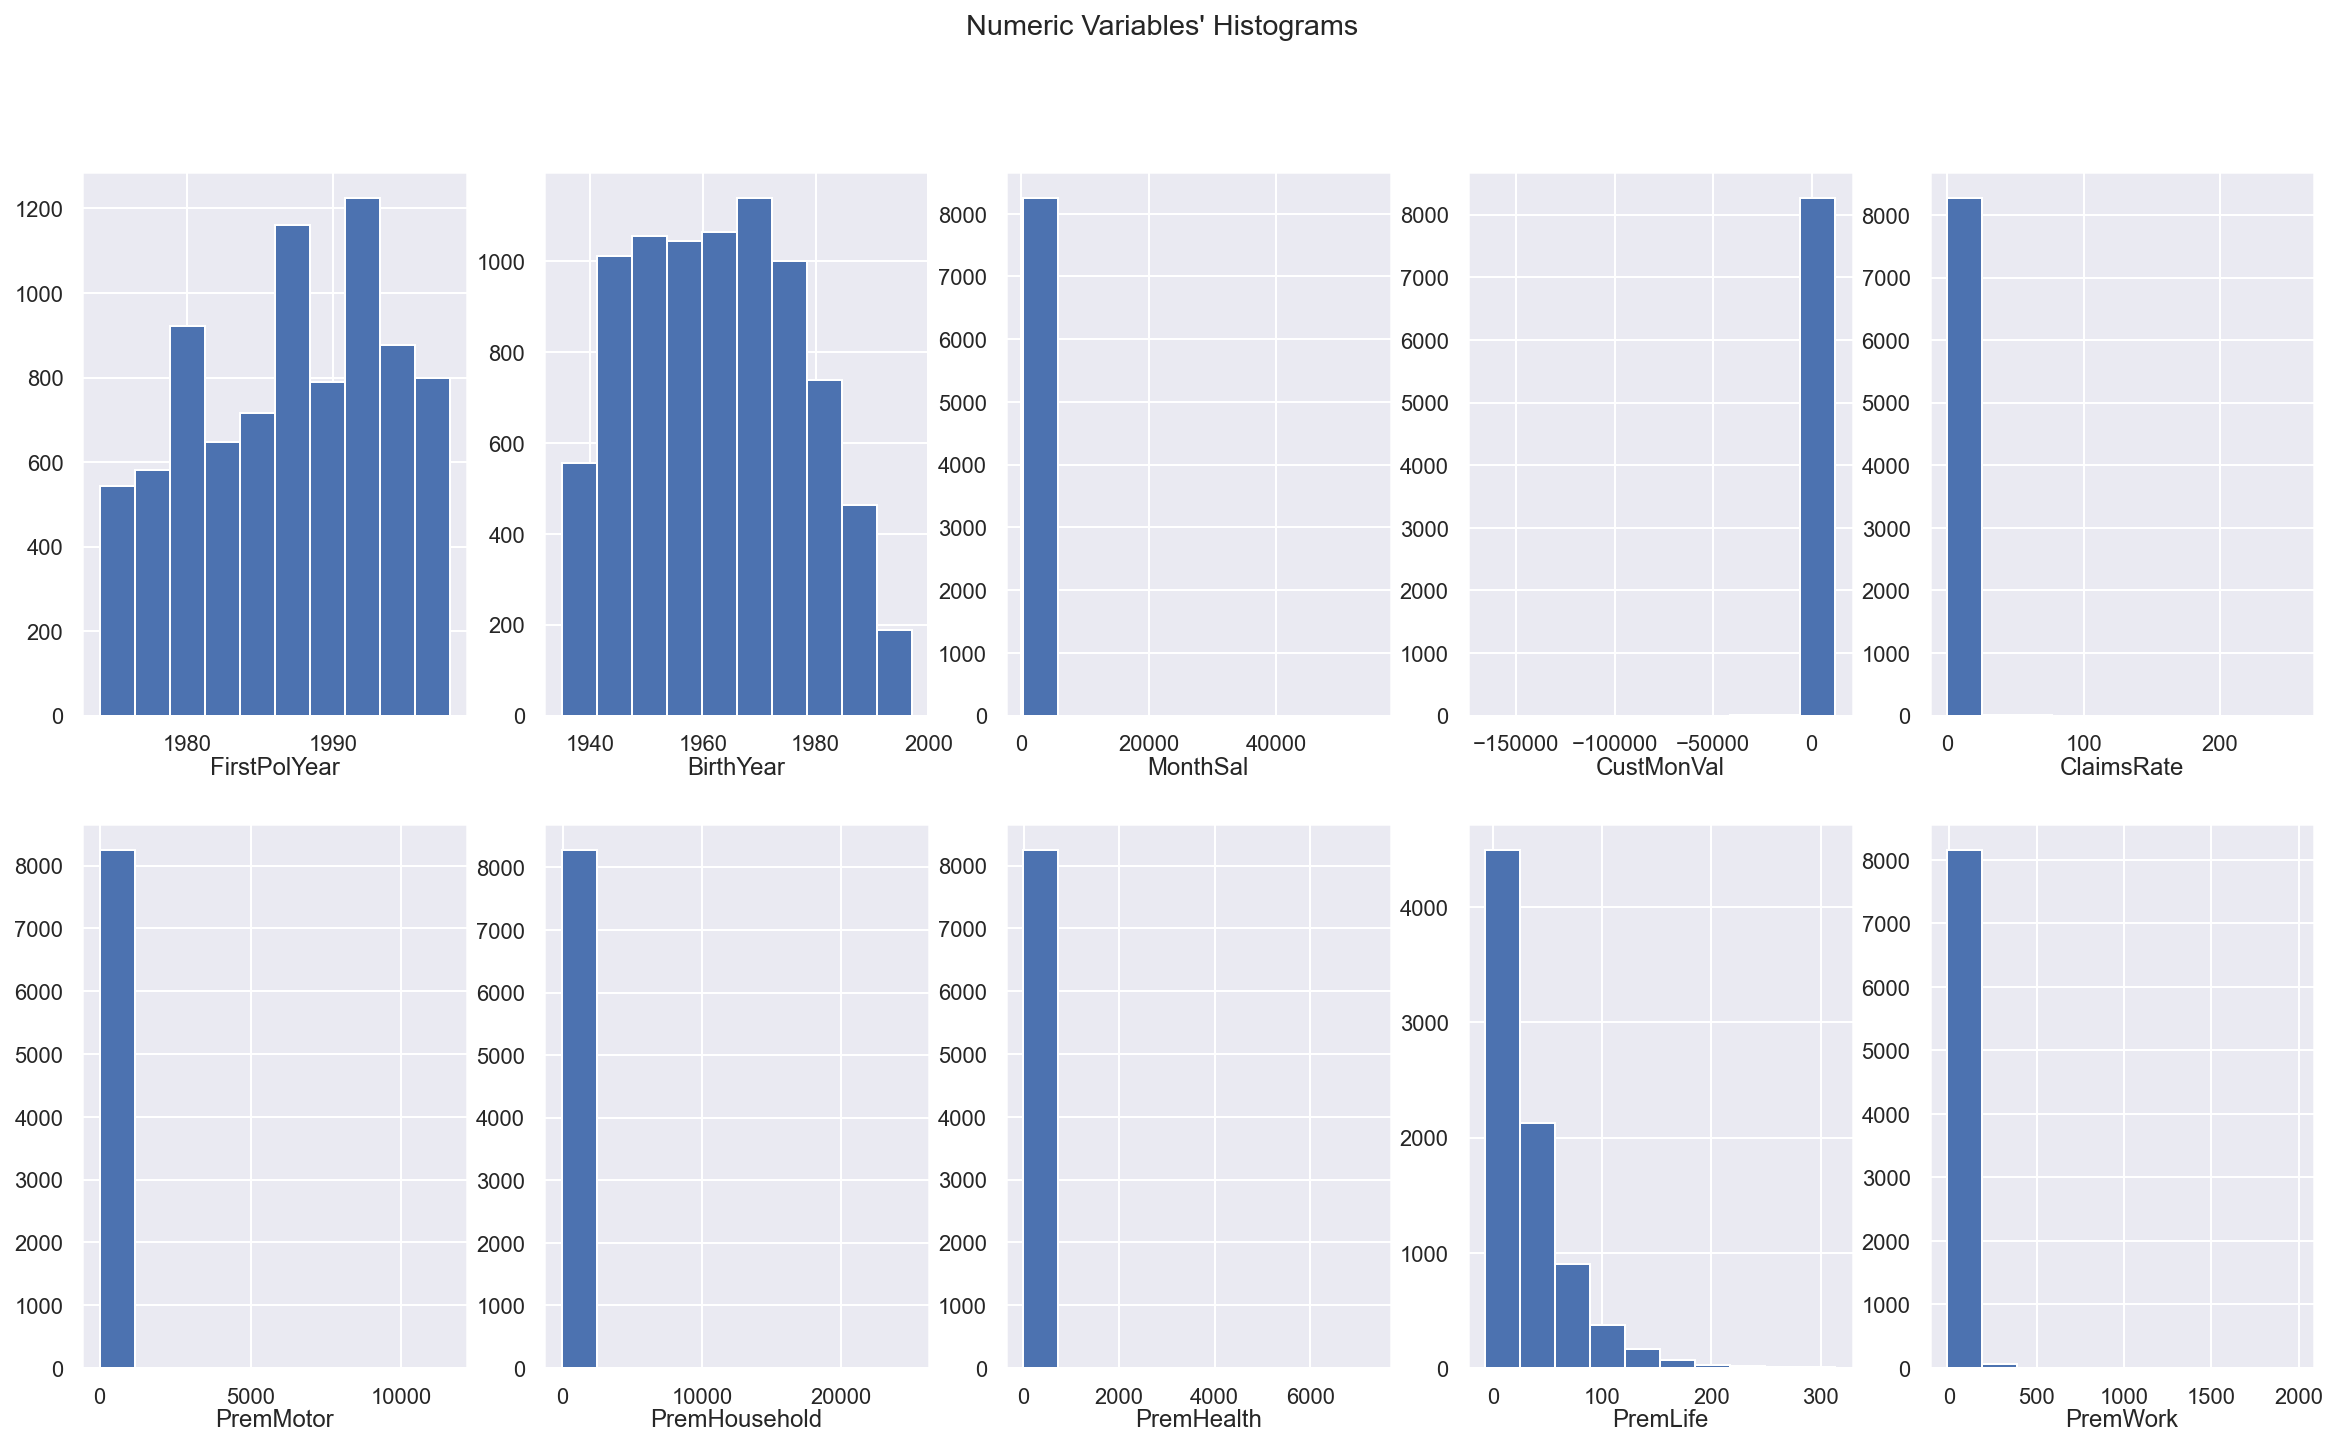

In [193]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data[feat][~np.isnan(data[feat])], bins=10)  
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

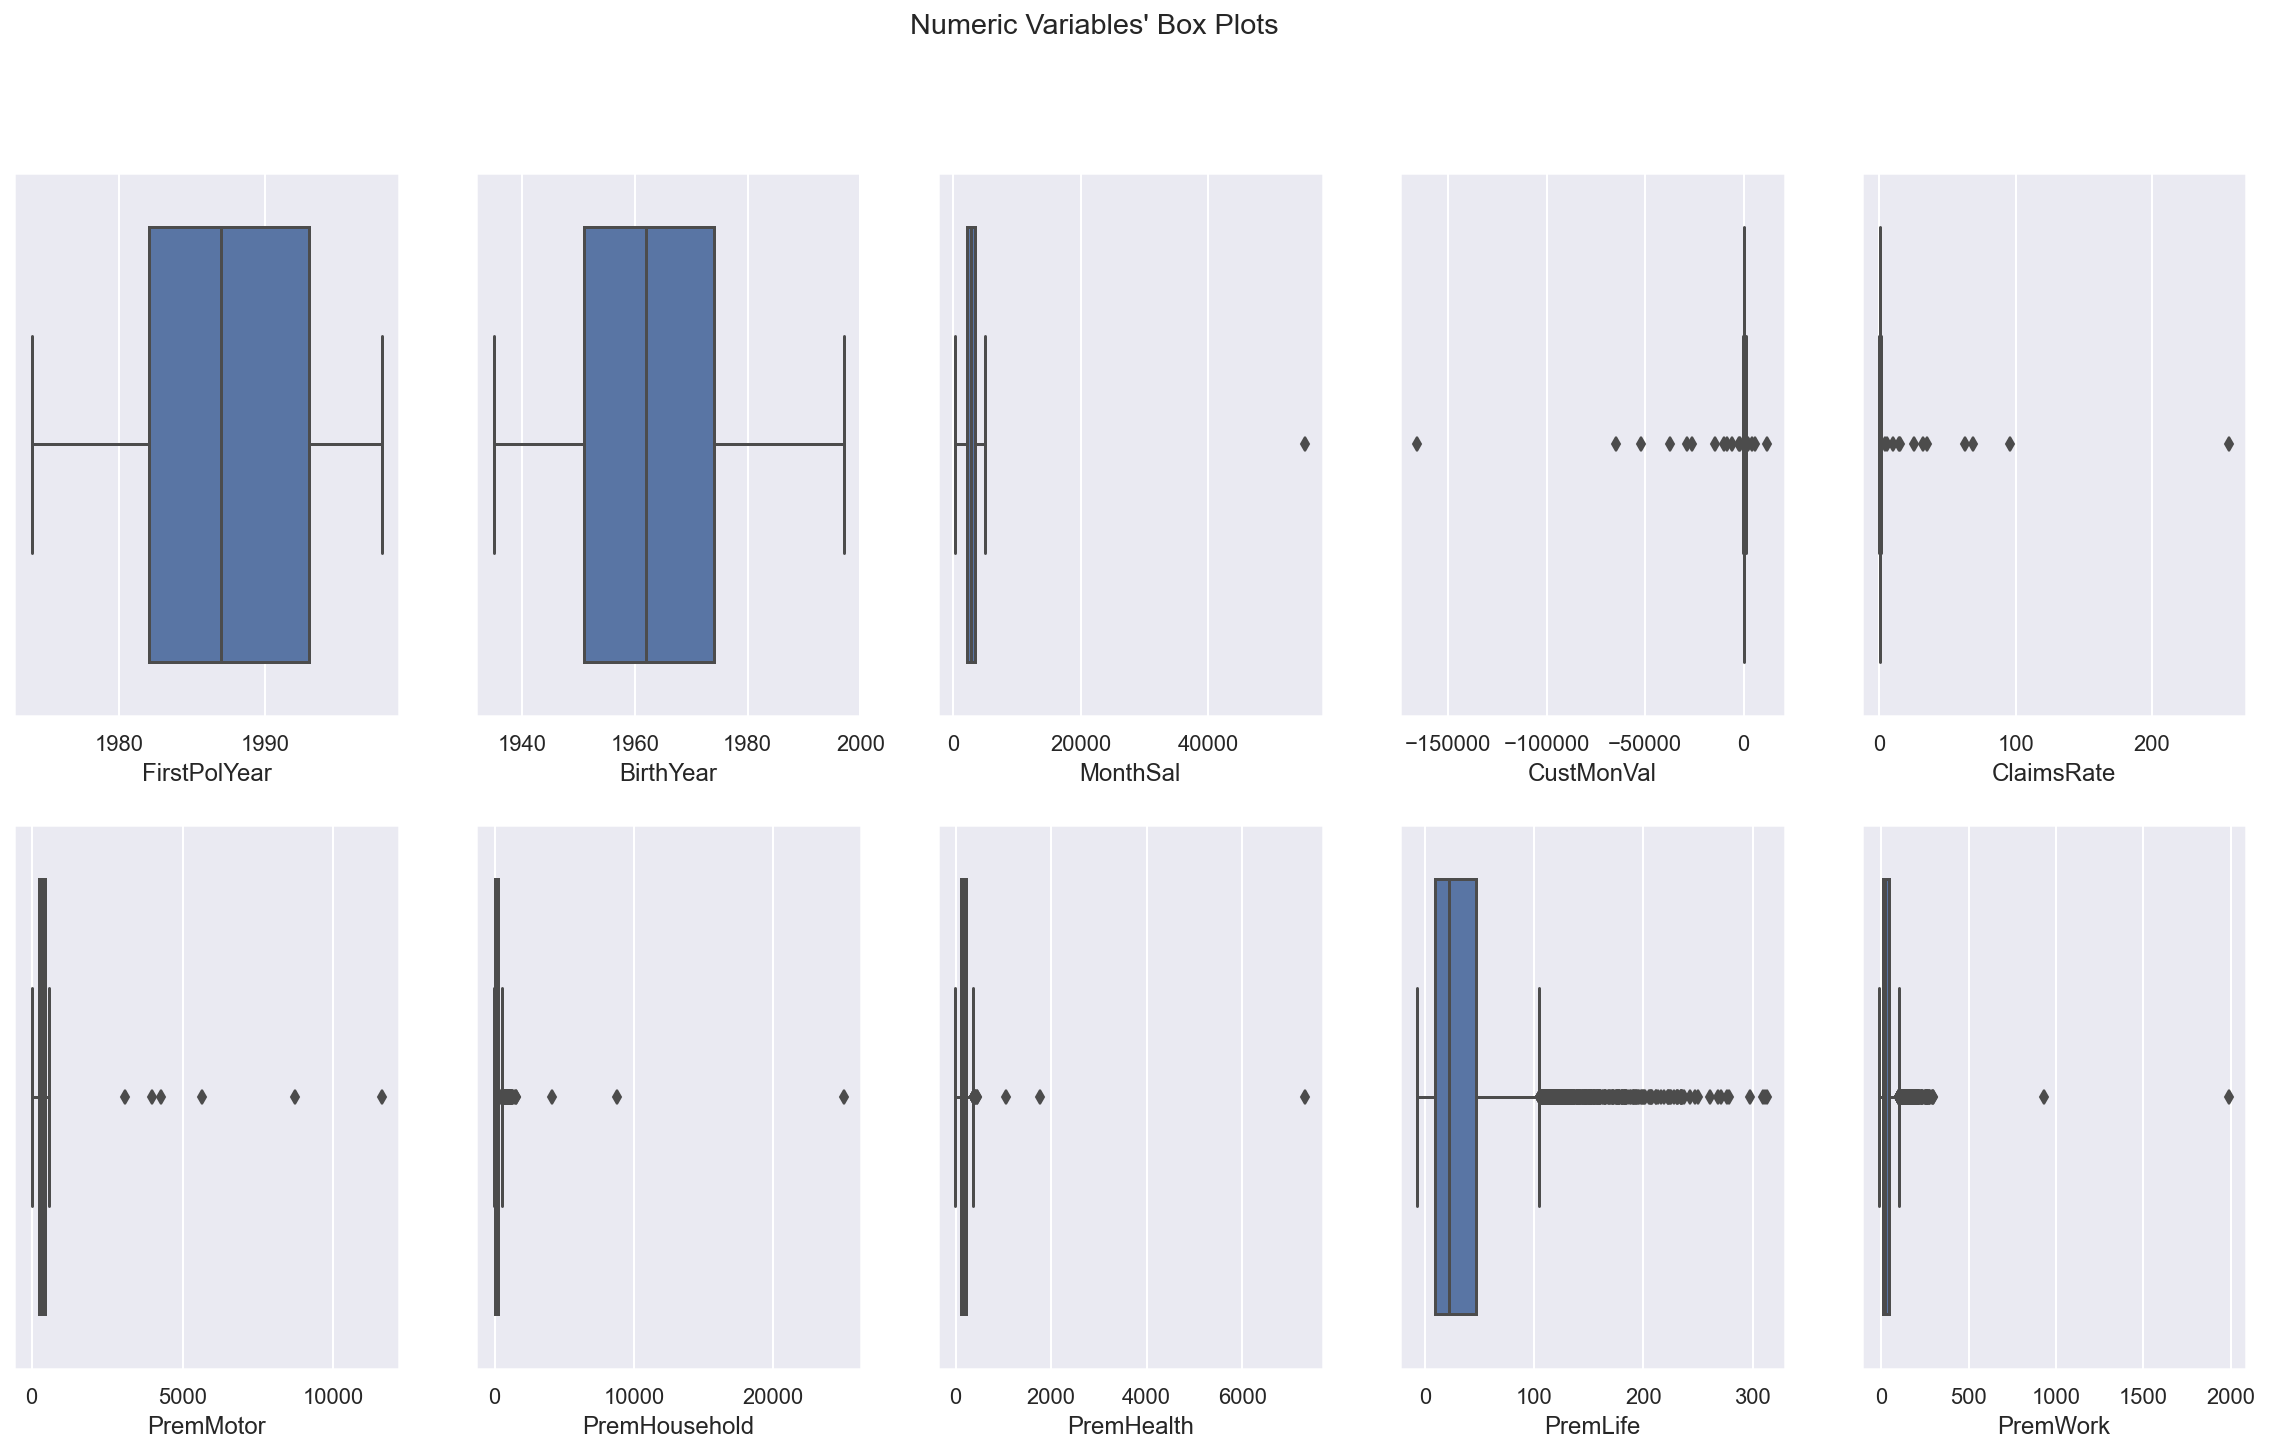

In [194]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

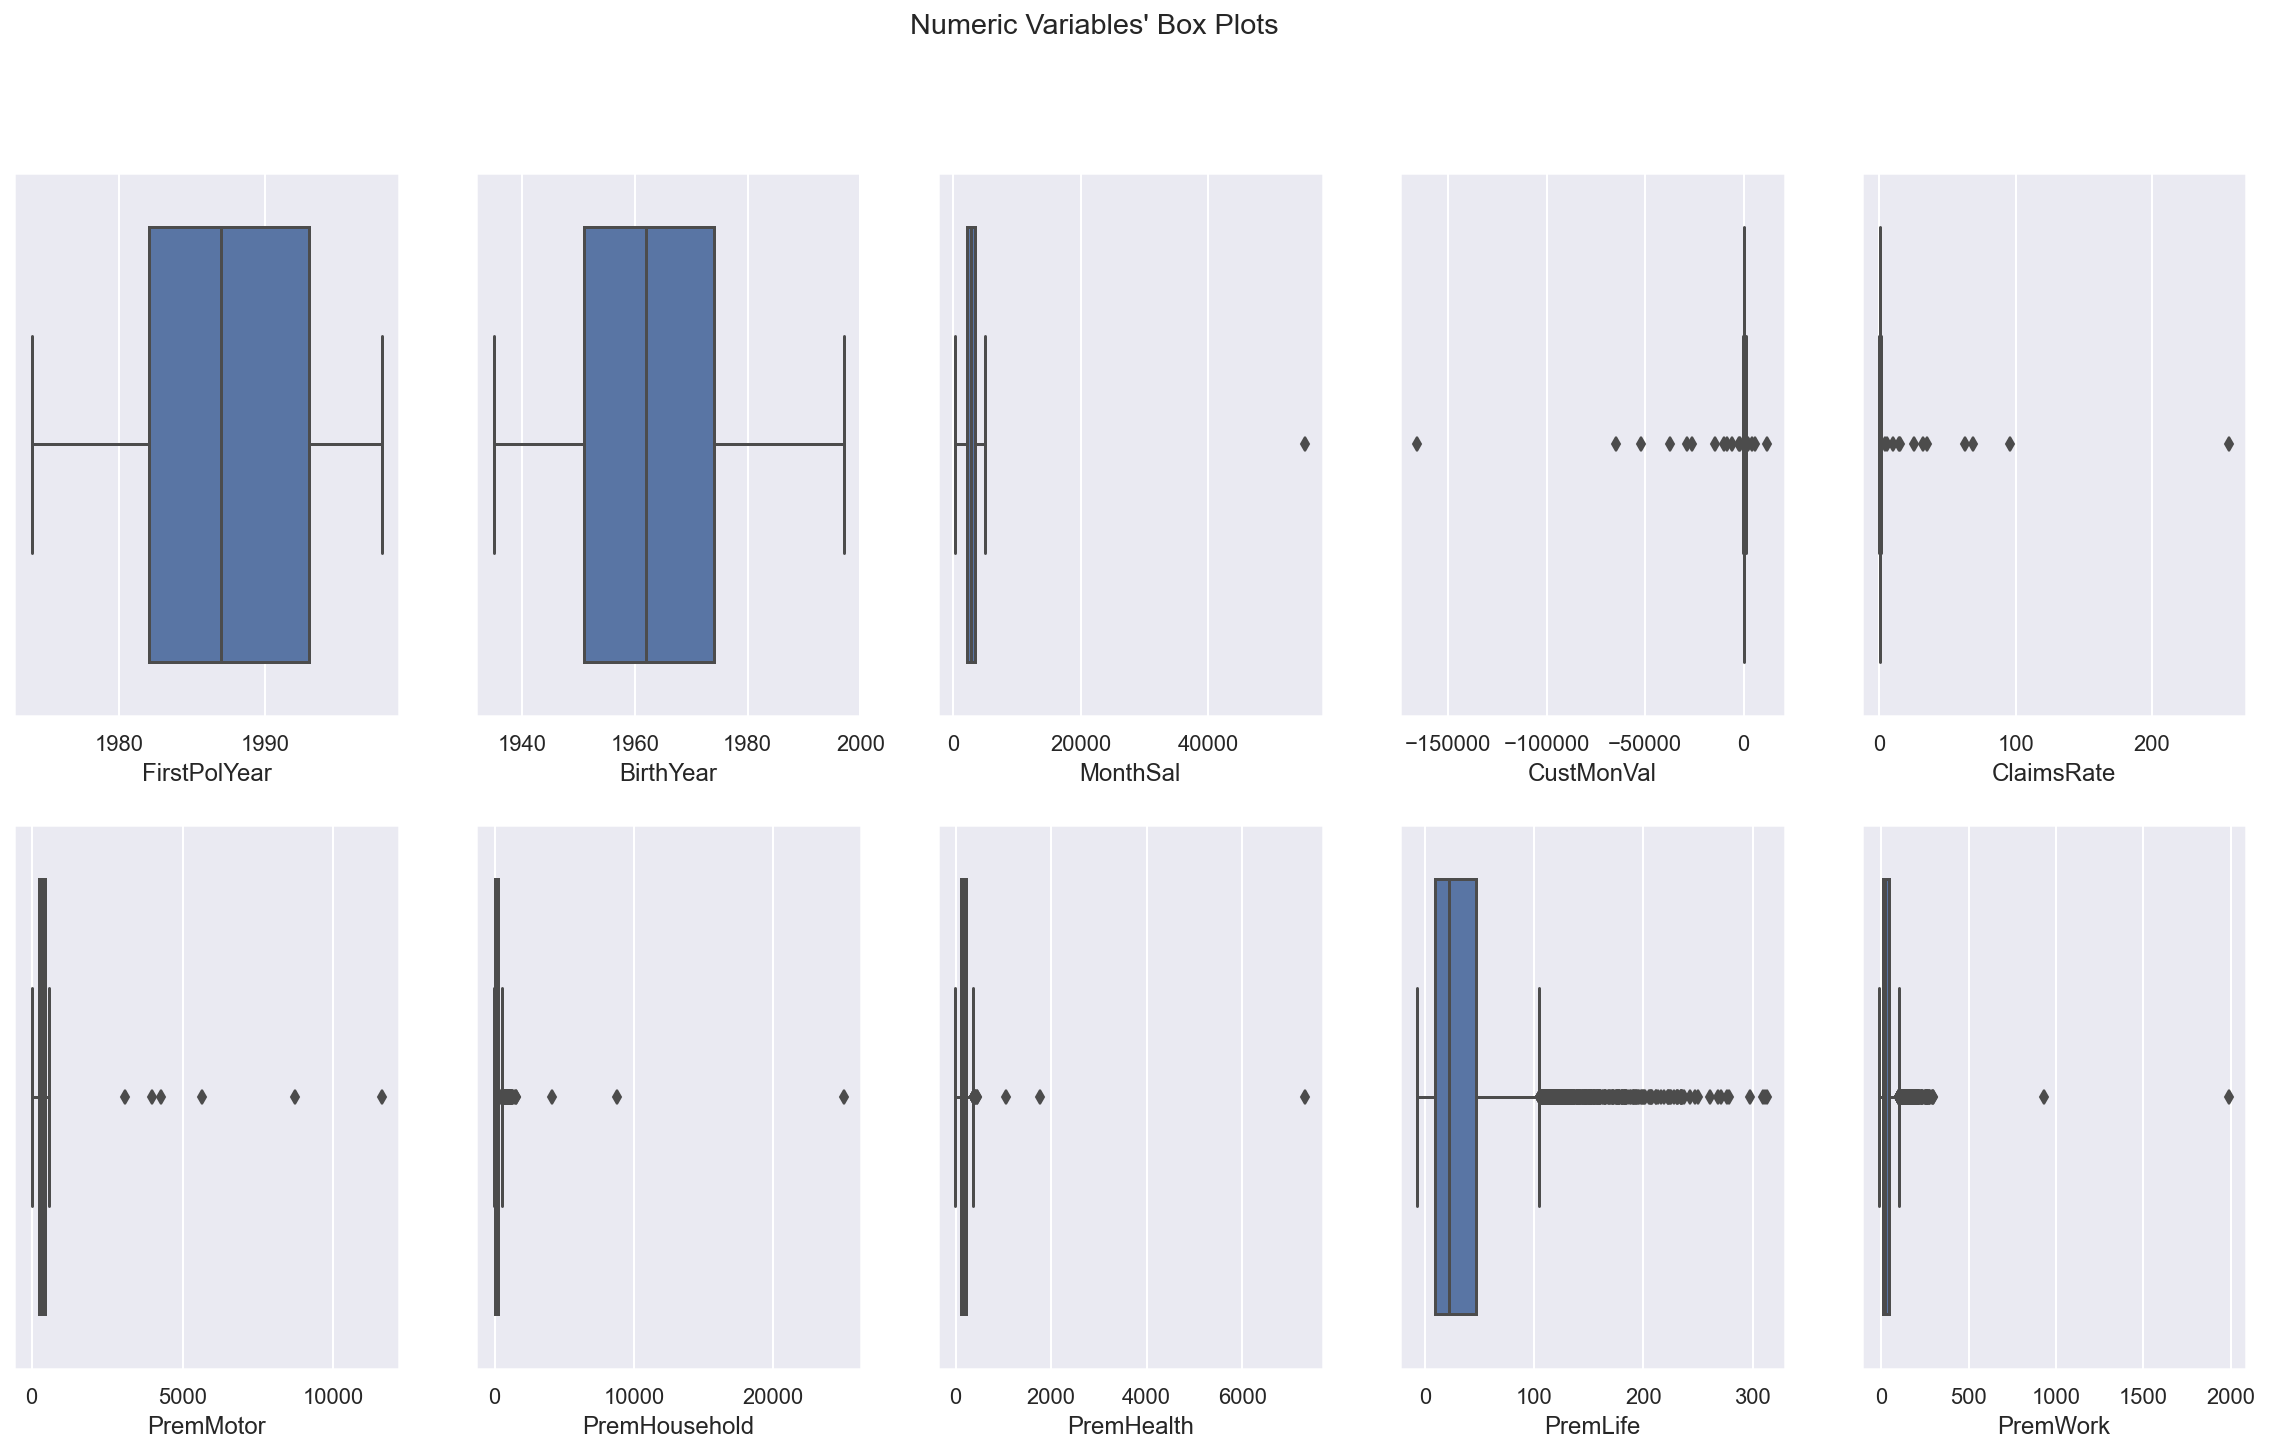

In [195]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

<a class="anchor" id="7th-bullet">

### 2.1.1. Manual Filter
    
</a>

In [196]:

filters1 = (
    
    ((data['MonthSal']<=10000) | (data['MonthSal'].isnull()))
    &
#     ((data['CustMonVal']>=-20000) | (data['CustMonVal'].isnull()))
#     &
    ((data['CustMonVal']>=-1000) | (data['CustMonVal'].isnull()))
    &
#     ((data['ClaimsRate']<=50)| (data['ClaimsRate'].isnull()))
#     &
    ((data['ClaimsRate']<=4)| (data['ClaimsRate'].isnull()))
    &
#     ((data['PremMotor']<=25000)| (data['PremMotor'].isnull()))
#     &
    ((data['PremMotor']<=2000)| (data['PremMotor'].isnull()))
    &
    ((data['PremHousehold']<=4000)| (data['PremHousehold'].isnull()))
    &
    ((data['PremHealth']<=800)| (data['PremHealth'].isnull()))
    &
    ((data['PremLife']<=150)| (data['PremLife'].isnull()))
    &
    ((data['PremWork']<=500)| (data['PremWork'].isnull()))   
    
)

data_1=data[filters1]

In [197]:
(1-(8114 /8294))*100

2.1702435495538963

In [198]:
data_consist.head()

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                    
1.0             1985       1982  2 - High School    2177.0            2   
3.0             1991       1970        1 - Basic    2277.0            1   
4.0             1990       1981      3 - BSc/MSc    1099.0            3   
5.0             1986       1973      3 - BSc/MSc    1763.0            3   
6.0             1986       1956  2 - High School    2566.0            2   

        EducDeg_cat  GeoLivArea  Children  CustMonVal  ClaimsRate   PremMotor  \
CustID                                                                          
1.0     High School           1         1  380.970001        0.39  375.850006   
3.0           Basic           3         0  504.670013        0.28  206.149994   
4.0         BSc/MSc           4         1      -16.99        0.99  182.479996   
5.0         BSc/MSc           4         1       35.23         0.9  338.619995   
6.0     High School           4         1      -24.33         1.0      440.75   

        PremHousehold  PremHealth   PremLife   PremWork  
CustID                                                   
1.0         79.449997  146.360001  47.009998  16.889999  
3.0             224.5  124.580002  86.349998  99.019997  
4.0         43.349998  311.170013      35.34      28.34  
5.0         47.799999  182.589996  18.780001  41.450001  
6.0              18.9  114.800003        7.0       7.67

In [199]:
data

FirstPolYear  BirthYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                                          
1.0              1985       1982    2177.0            2           1         1   
3.0              1991       1970    2277.0            1           3         0   
4.0              1990       1981    1099.0            3           4         1   
5.0              1986       1973    1763.0            3           4         1   
6.0              1986       1956    2566.0            2           4         1   
...               ...        ...       ...          ...         ...       ...   
10292.0          1984       1949    3188.0            4           2         0   
10293.0          1977       1952    2431.0            1           3         0   
10294.0          1994       1976    2918.0            3           1         1   
10295.0          1981       1977    1971.0            1           2         1   
10296.0          1990       1981    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
6.0           -24.33         1.0      440.75           18.9  114.800003   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

          PremLife    PremWork  
CustID                          
1.0      47.009998   16.889999  
3.0      86.349998   99.019997  
4.0          35.34       28.34  
5.0      18.780001   41.450001  
6.0            7.0        7.67  
...            ...         ...  
10292.0       9.78       14.78  
10293.0      12.89  105.129997  
10294.0      12.67        4.89  
10295.0  63.900002  112.910004  
10296.0       6.89       12.89  

[8278 rows x 13 columns]

In [200]:
print('Percentage of outliers removed:', 1-np.round((data_1.shape[0] / data.shape[0]), 4))

Percentage of outliers removed: 0.01980000000000004


In [201]:
outliers = data[~filters1]

In [202]:
data=data[filters1]

In [203]:
data

FirstPolYear  BirthYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                                          
1.0              1985       1982    2177.0            2           1         1   
3.0              1991       1970    2277.0            1           3         0   
4.0              1990       1981    1099.0            3           4         1   
5.0              1986       1973    1763.0            3           4         1   
6.0              1986       1956    2566.0            2           4         1   
...               ...        ...       ...          ...         ...       ...   
10292.0          1984       1949    3188.0            4           2         0   
10293.0          1977       1952    2431.0            1           3         0   
10294.0          1994       1976    2918.0            3           1         1   
10295.0          1981       1977    1971.0            1           2         1   
10296.0          1990       1981    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
6.0           -24.33         1.0      440.75           18.9  114.800003   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

          PremLife    PremWork  
CustID                          
1.0      47.009998   16.889999  
3.0      86.349998   99.019997  
4.0          35.34       28.34  
5.0      18.780001   41.450001  
6.0            7.0        7.67  
...            ...         ...  
10292.0       9.78       14.78  
10293.0      12.89  105.129997  
10294.0      12.67        4.89  
10295.0  63.900002  112.910004  
10296.0       6.89       12.89  

[8114 rows x 13 columns]

Text(0.5, 0.98, "Numeric Variables' Histograms")

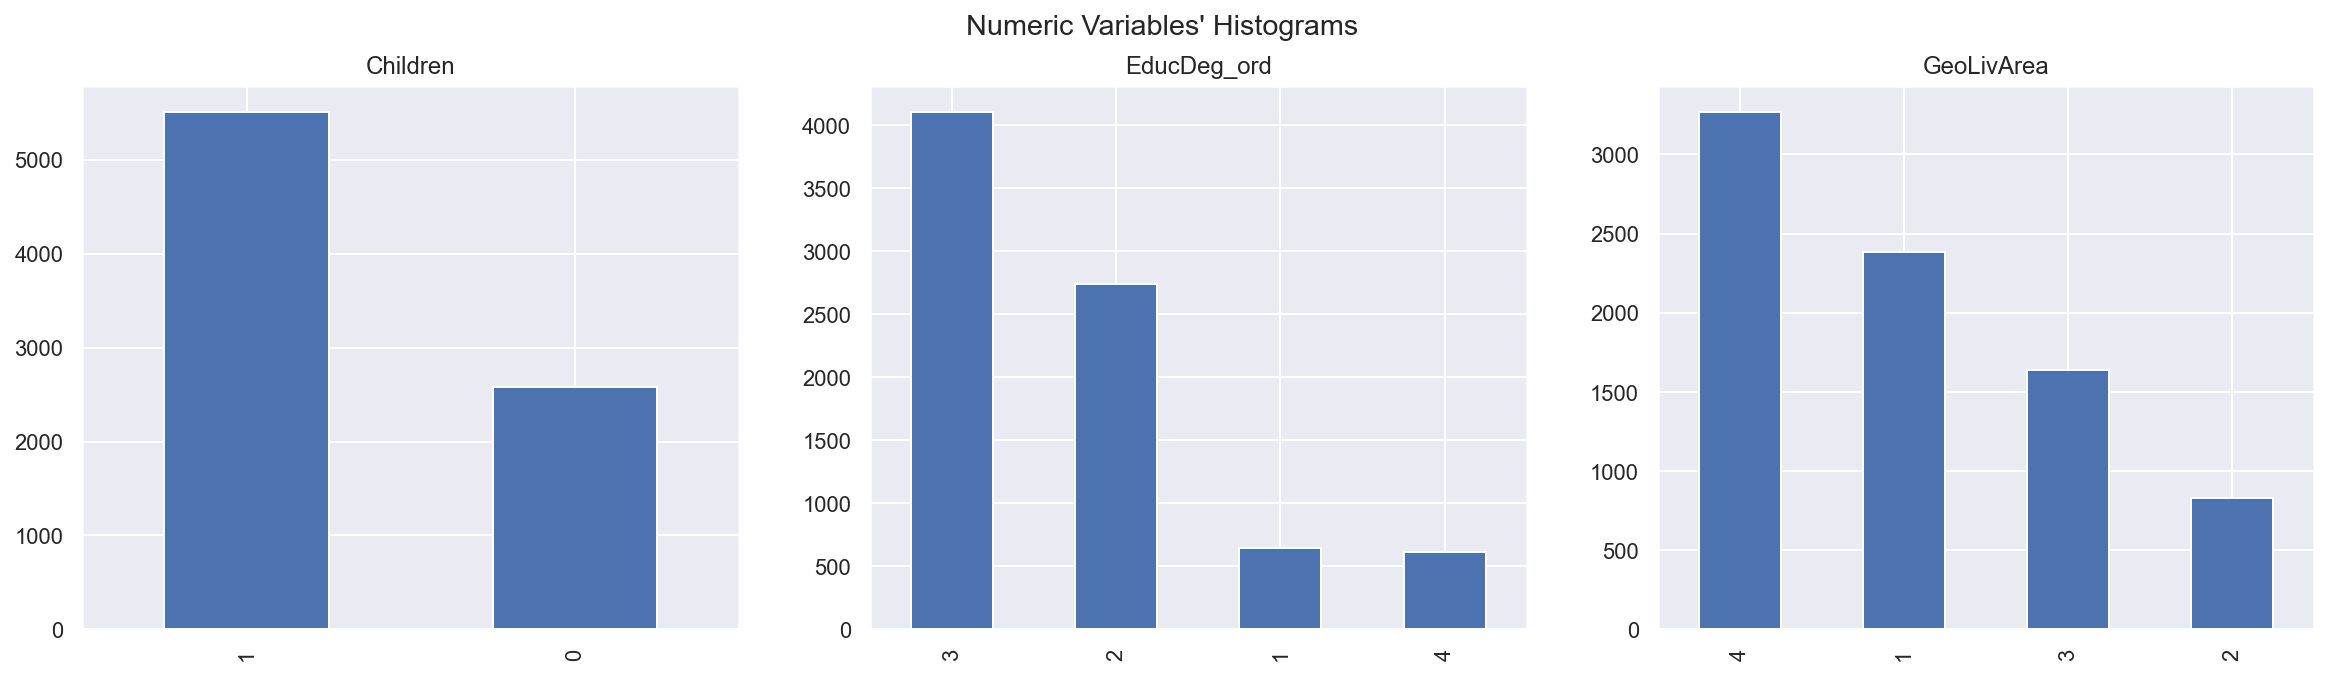

In [204]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, ax = plt.subplots(1, len(non_metric_features),figsize=(20, 5))

for i, categorical_feature in enumerate(data[non_metric_features]):
    data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

In [205]:
data.isna().sum()

FirstPolYear     15
BirthYear        16
MonthSal         24
EducDeg_ord       0
GeoLivArea        1
Children         18
CustMonVal        0
ClaimsRate        0
PremMotor        25
PremHousehold     0
PremHealth       30
PremLife         92
PremWork         69
dtype: int64

<a class="anchor" id="8th-bullet">

### 2.2.2  IQR Method
    
</a>

In [214]:
# IQR model is good to apply to the features that are not very interpretable
import scipy
iqr=scipy.stats.iqr(data['MonthSal'],nan_policy='omit')

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    
    filters.append(
        
        if data[metric].isna():  data[metric].between(llim, ulim, inclusive=True))

df_2 = data[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

SyntaxError: invalid syntax (Temp/ipykernel_12480/2087868608.py, line 15)

In [ ]:
#[True for data['MonthSal'] if data['MonthSal'].isna() ]
lista=[]
for i in range(len(data['MonthSal'])):
    if data['MonthSal'][i].isna():
        lista[i]=True
    else:
        if (data[metric]>=llim) and (data[metric]<=ulim):
            
            lista[i]=True
        else:
            lista[i]=False
            
    

In [ ]:
# iqr=scipy.stats.iqr(data['MonthSal'],nan_policy='omit')
# q25 = data['MonthSal'].quantile(.25)
# q75 = data['MonthSal'].quantile(.75)
# data['MonthSal'] < ((q25 - 1.5 * iqr) |(data['MonthSal'] > (q75 + 1.5 * iqr)))



In [ ]:
# Create a mask inbeetween q1 & q3
mask = df['col'].between(q1, q3, inclusive=True)

# Filtering the initial dataframe with a mask
iqr = df.loc[mask, 'col']

In [ ]:
0.0

In [37]:
def drop_outliers_IQR(df, iqr_mult,  metric_features):
    #lista_index = list(df.index)
    filters2 = []
    
    for metric in metric_features:
    
        q25 = df[metric].quantile(.25)
        q75 = df[metric].quantile(.75)
        iqr = (q75 - q25)
        upper_lim = q75 + (iqr_mult * iqr)
        lower_lim = q25 - (iqr_mult * iqr)
        filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))

    filters2 = pd.Series(np.all(filters2, 0), index=df.index)
    df_1 = df[filters2]
   

    return df_1

In [45]:
drop_outliers_IQR(data, 3,  ['ClaimsRate'])

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_5756/3848163064.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))


FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
6.0              1986       1956  2 - High School    2566.0            2   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         GeoLivArea  Children   CustMonVal  ClaimsRate   PremMotor  \
CustID                                                               
1.0               1         1   380.970001        0.39  375.850006   
3.0               3         0   504.670013        0.28  206.149994   
4.0               4         1       -16.99        0.99  182.479996   
5.0               4         1        35.23         0.9  338.619995   
6.0               4         1       -24.33         1.0      440.75   
...             ...       ...          ...         ...         ...   
10292.0           2         0        -0.11        0.96   393.73999   
10293.0           3         0  1405.599976         0.0  133.580002   
10294.0           1         1   524.099976        0.21  403.630005   
10295.0           2         1   250.050003        0.65  188.589996   
10296.0           1         1       463.75        0.27  414.079987   

         PremHousehold  PremHealth   PremLife    PremWork  
CustID                                                     
1.0          79.449997  146.360001  47.009998   16.889999  
3.0              224.5  124.580002  86.349998   99.019997  
4.0          43.349998  311.170013      35.34       28.34  
5.0          47.799999  182.589996  18.780001   41.450001  
6.0               18.9  114.800003        7.0        7.67  
...                ...         ...        ...         ...  
10292.0      49.450001  173.809998       9.78       14.78  
10293.0        1035.75      143.25      12.89  105.129997  
10294.0     132.800003      142.25      12.67        4.89  
10295.0     211.149994  198.369995  63.900002  112.910004  
10296.0      94.449997      141.25       6.89       12.89  

[8282 rows x 14 columns]

In [ ]:
data_out_rmv=data.copy()

<a class="anchor" id="8th-bullet">

### 2.2.3  Multi-dimentional outliers
    
</a>

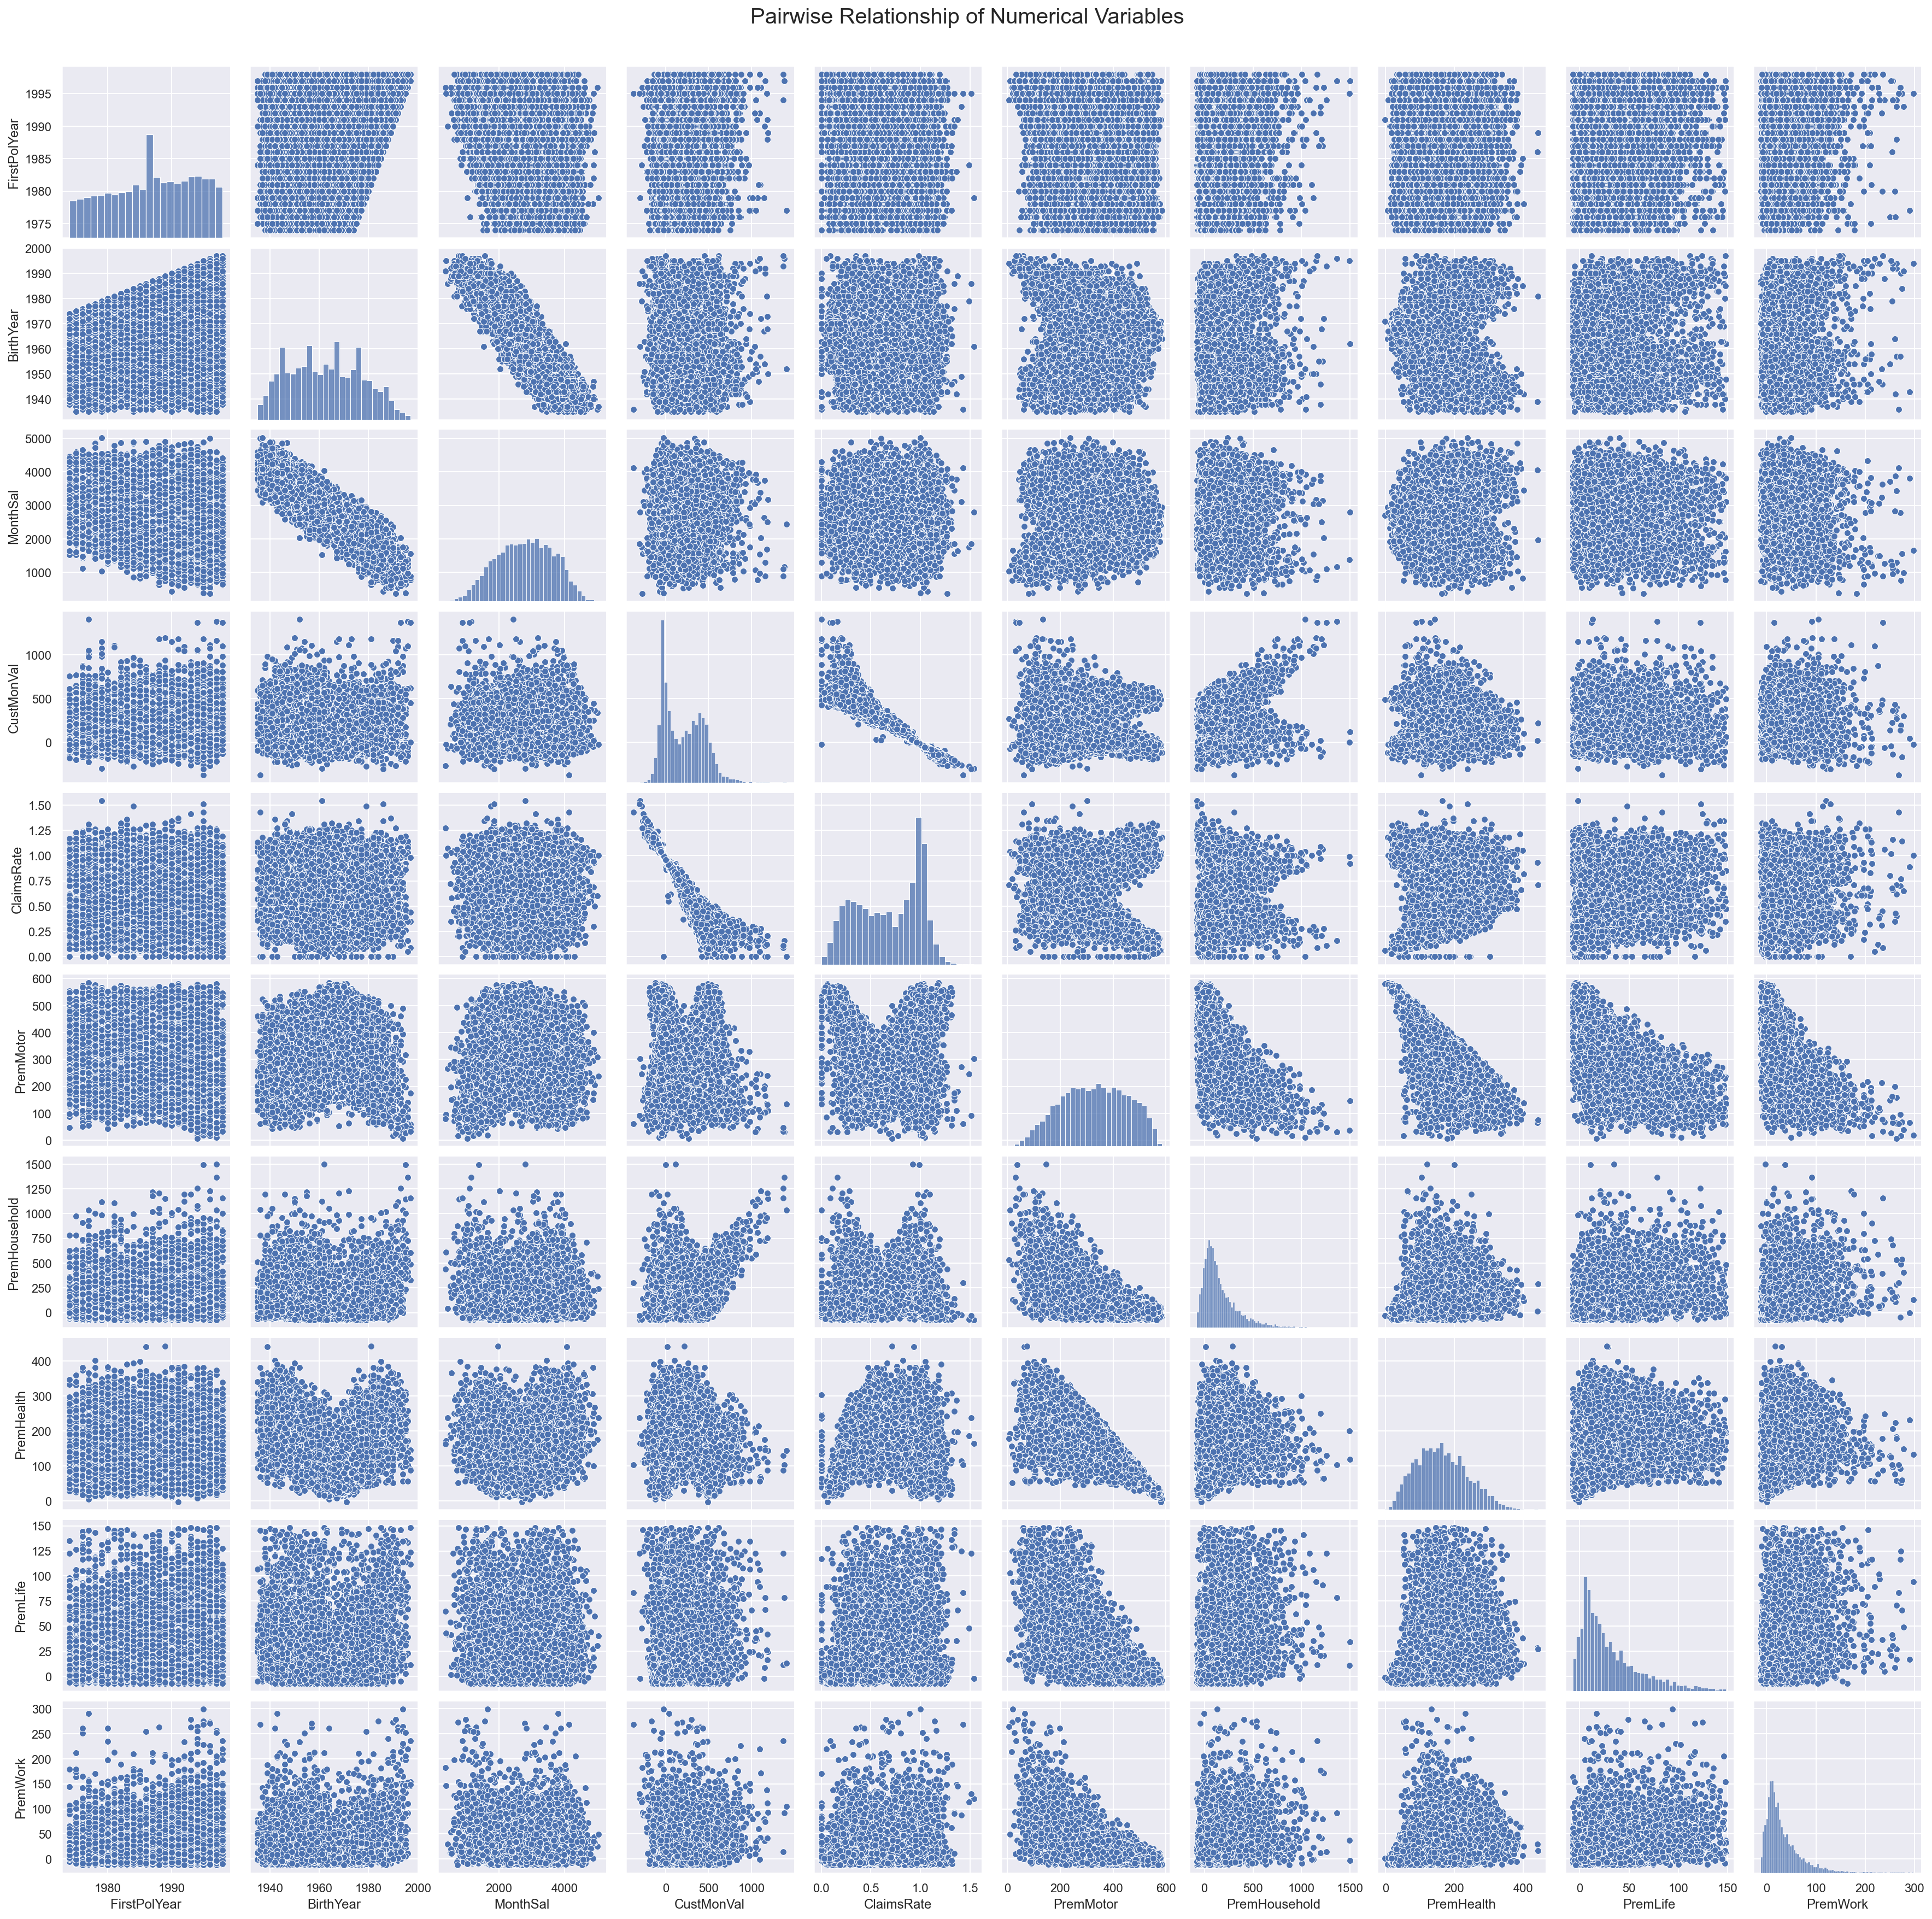

In [124]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()


<a class="anchor" id="9th-bullet">

### 2.5 Scale the data
    
</a>

In [206]:
# scale the data before the missing values imputation due to KNN

from sklearn.preprocessing import MinMaxScaler
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data[metric_features])
scaled_feat

array([[0.45833333, 0.75806452, 0.38825554, ..., 0.33366296, 0.34789049,
        0.09304348],
       [0.70833333, 0.56451613, 0.40976554, ..., 0.28471584, 0.60128823,
        0.35755232],
       [0.66666667, 0.74193548, 0.15637772, ..., 0.70404752, 0.27272142,
        0.12991949],
       ...,
       [0.83333333, 0.66129032, 0.54764465, ..., 0.32442638, 0.12669887,
        0.05439613],
       [0.29166667, 0.67741935, 0.34394493, ..., 0.45054723, 0.45668278,
        0.40228665],
       [0.66666667, 0.74193548, 0.52548935, ..., 0.32217903, 0.0894686 ,
        0.08016103]])

In [207]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [1974.         1935.          372.         -376.29000854    0.
    6.78000021  -75.           -2.1099999    -7.          -12.        ] 
 [1.99800000e+03 1.99700000e+03 5.02100000e+03 1.40559998e+03
 1.53999996e+00 5.85219971e+02 1.49805005e+03 4.42859985e+02
 1.48250000e+02 2.98500000e+02]


In [208]:
data[metric_features] = scaled_feat
data.head()

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


FirstPolYear  BirthYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                                         
1.0         0.458333   0.758065  0.388256            2           1         1   
3.0         0.708333   0.564516  0.409766            1           3         0   
4.0         0.666667   0.741935  0.156378            3           4         1   
5.0         0.500000   0.612903  0.299204            3           4         1   
6.0         0.500000   0.338710  0.471929            2           4         1   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
1.0       0.424976    0.253247   0.638044       0.098185    0.333663   
3.0       0.494396    0.181818   0.344668       0.190394    0.284716   
4.0       0.201640    0.642857   0.303748       0.075236    0.704048   
5.0       0.230946    0.584416   0.573681       0.078065    0.415084   
6.0       0.197521    0.649351   0.750242       0.059693    0.262737   

        PremLife  PremWork  
CustID                      
1.0     0.347890  0.093043  
3.0     0.601288  0.357552  
4.0     0.272721  0.129919  
5.0     0.166055  0.172142  
6.0     0.090177  0.063349

In [209]:
# Checking max and min of minmaxed variables
data[metric_features].describe().round(2)

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
count       8099.00    8098.00   8090.00     8114.00     8114.00    8089.00   
mean           0.54       0.45      0.52        0.33        0.44       0.56   
std            0.27       0.23      0.18        0.13        0.21       0.21   
min            0.00       0.00      0.00        0.00        0.00       0.00   
25%            0.33       0.26      0.38        0.21        0.25       0.39   
50%            0.54       0.44      0.52        0.32        0.47       0.56   
75%            0.79       0.63      0.66        0.43        0.64       0.73   
max            1.00       1.00      1.00        1.00        1.00       1.00   

       PremHousehold  PremHealth  PremLife  PremWork  
count        8114.00     8084.00   8022.00   8045.00  
mean            0.15        0.37      0.24      0.14  
std             0.12        0.17      0.20      0.12  
min             0.00        0.00      0.00      0.00  
25%             0.07        0.25      0.10      0.07  
50%             0.12        0.36      0.18      0.11  
75%             0.20        0.49      0.34      0.19  
max             1.00        1.00      1.00      1.00

In [210]:
data.describe().T

count      mean       std  min       25%       50%       75%  \
FirstPolYear   8099.0  0.536769  0.271181  0.0  0.333333  0.541667  0.791667   
BirthYear      8098.0  0.445110  0.234486  0.0  0.258065  0.435484  0.629032   
MonthSal       8090.0  0.519269  0.182908  0.0  0.381157  0.524306  0.661217   
EducDeg_ord    8114.0  2.579123  0.744734  1.0  2.000000  3.000000  3.000000   
GeoLivArea     8113.0  2.714162  1.263885  1.0  1.000000  3.000000  4.000000   
Children       8096.0  0.680830  0.466184  0.0  0.000000  1.000000  1.000000   
CustMonVal     8114.0  0.328538  0.131784  0.0  0.205397  0.316669  0.432820   
ClaimsRate     8114.0  0.438210  0.208168  0.0  0.248377  0.467532  0.636364   
PremMotor      8089.0  0.557605  0.213267  0.0  0.392504  0.563308  0.727958   
PremHousehold  8114.0  0.151272  0.116707  0.0  0.072757  0.116907  0.197451   
PremHealth     8084.0  0.371923  0.166835  0.0  0.245005  0.359642  0.486010   
PremLife       8022.0  0.244165  0.197945  0.0  0.101643  0.178229  0.335717   
PremWork       8045.0  0.143644  0.117249  0.0  0.066924  0.108792  0.187182   

               max  
FirstPolYear   1.0  
BirthYear      1.0  
MonthSal       1.0  
EducDeg_ord    4.0  
GeoLivArea     4.0  
Children       1.0  
CustMonVal     1.0  
ClaimsRate     1.0  
PremMotor      1.0  
PremHousehold  1.0  
PremHealth     1.0  
PremLife       1.0  
PremWork       1.0

<a class="anchor" id="10th-bullet">

### 2.1. Missing Values
    
</a>

In [211]:
# Checking maximum number of nan in a record
maxi=0
ind_max=0
for i in data.index:
    if data.loc[i,:].isna().sum()>maxi:
        maxi=data.loc[i,:].isna().sum()
        ind_max=i
print(maxi,ind_max)

#decided not to drop the record since there are many more features.

4 863.0


In [212]:
check_nan_feature=pd.DataFrame(data.isna().sum()).rename(columns={0:'Nr_missings'})
#check_nan_feature.columns.values[0]="Nr_missings"
print(check_nan_feature)
check_nan_feature['perc']=check_nan_feature['Nr_missings']/len(data) *100

               Nr_missings
FirstPolYear            15
BirthYear               16
MonthSal                24
EducDeg_ord              0
GeoLivArea               1
Children                18
CustMonVal               0
ClaimsRate               0
PremMotor               25
PremHousehold            0
PremHealth              30
PremLife                92
PremWork                69


In [213]:
check_nan_feature
# there is no feature with more than 20% of nan values-- no feature will be removed

Nr_missings      perc
FirstPolYear            15  0.184866
BirthYear               16  0.197190
MonthSal                24  0.295785
EducDeg_ord              0  0.000000
GeoLivArea               1  0.012324
Children                18  0.221839
CustMonVal               0  0.000000
ClaimsRate               0  0.000000
PremMotor               25  0.308109
PremHousehold            0  0.000000
PremHealth              30  0.369731
PremLife                92  1.133843
PremWork                69  0.850382

In [214]:
# Filled nan values in insurance expenses with 0
data['PremMotor'].fillna(0, inplace = True)
data['PremHealth'].fillna(0, inplace = True)
data['PremLife'].fillna(0, inplace = True)
data['PremWork'].fillna(0, inplace = True)

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [215]:
data['GeoLivArea'].value_counts()
mode_geo = data['GeoLivArea'].mode().loc[0]
mode_geo
data['GeoLivArea'].fillna(mode_geo, inplace=True)

In [216]:
data.isna().sum()

FirstPolYear     15
BirthYear        16
MonthSal         24
EducDeg_ord       0
GeoLivArea        0
Children         18
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [217]:
data=data[~((data['FirstPolYear'].isna()) & (data['BirthYear'].isna()))]

In [218]:
input_data=data.copy()

In [219]:
from sklearn.impute import KNNImputer

# KNNImputer - only works for numerical varaibles
imputer = KNNImputer(n_neighbors=5, weights="distance")
input_data['MonthSal'] = imputer.fit_transform(input_data[['MonthSal']])


In [220]:
input_data

FirstPolYear  BirthYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                                          
1.0          0.458333   0.758065  0.388256            2           1         1   
3.0          0.708333   0.564516  0.409766            1           3         0   
4.0          0.666667   0.741935  0.156378            3           4         1   
5.0          0.500000   0.612903  0.299204            3           4         1   
6.0          0.500000   0.338710  0.471929            2           4         1   
...               ...        ...       ...          ...         ...       ...   
10292.0      0.416667   0.225806  0.605722            4           2         0   
10293.0      0.125000   0.274194  0.442891            1           3         0   
10294.0      0.833333   0.661290  0.547645            3           1         1   
10295.0      0.291667   0.677419  0.343945            1           2         1   
10296.0      0.666667   0.741935  0.525489            4           1         1   

         CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1.0        0.424976    0.253247   0.638044       0.098185    0.333663   
3.0        0.494396    0.181818   0.344668       0.190394    0.284716   
4.0        0.201640    0.642857   0.303748       0.075236    0.704048   
5.0        0.230946    0.584416   0.573681       0.078065    0.415084   
6.0        0.197521    0.649351   0.750242       0.059693    0.262737   
...             ...         ...        ...            ...         ...   
10292.0    0.211113    0.623377   0.668972       0.079114    0.395353   
10293.0    1.000000    0.000000   0.219210       0.706112    0.326674   
10294.0    0.505301    0.136364   0.686069       0.132100    0.324426   
10295.0    0.351503    0.422078   0.314311       0.181908    0.450547   
10296.0    0.471432    0.175325   0.704135       0.107721    0.322179   

         PremLife  PremWork  
CustID                       
1.0      0.347890  0.093043  
3.0      0.601288  0.357552  
4.0      0.272721  0.129919  
5.0      0.166055  0.172142  
6.0      0.090177  0.063349  
...           ...       ...  
10292.0  0.108084  0.086248  
10293.0  0.128116  0.377230  
10294.0  0.126699  0.054396  
10295.0  0.456683  0.402287  
10296.0  0.089469  0.080161  

[8111 rows x 13 columns]

In [229]:
input_data_log=input_data[~input_data.isna()]
X_input_data_log=input_data_log.drop('Children', axis=1)
y_log=input_data_log['Children']




from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val = train_test_split(X_input_data_log,y_log,test_size=0.3,random_state=5, stratify=y_log)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

AttributeError: 'bool' object has no attribute 'any'

In [160]:
input_data.dropna(subset = ['Children'], inplace = True)

In [233]:
input_data.dtypes

FirstPolYear     float64
BirthYear        float64
MonthSal         float64
EducDeg_ord        Int32
GeoLivArea         Int32
Children           Int32
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [223]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
input_data['BirthYear'] = imputer.fit_transform(input_data[['BirthYear']])

In [224]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
input_data['FirstPolYear'] = imputer.fit_transform(input_data[['FirstPolYear']])

In [225]:
input_data['EducDeg_ord'].value_counts()

3    4108
2    2743
1     644
4     616
Name: EducDeg_ord, dtype: Int64

In [226]:
input_data['EducDeg_ord'].value_counts()
mode_educ = input_data['EducDeg_ord'].mode().loc[0]
input_data['EducDeg_ord'].fillna(mode_educ, inplace=True)

In [227]:
input_data.isna().sum()

FirstPolYear      0
BirthYear         0
MonthSal          0
EducDeg_ord       0
GeoLivArea        0
Children         18
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [248]:
data=input_data

<a class="anchor" id="10th-bullet">

### 2.1.1 KNN
    
</a>


<a class="anchor" id="11th-bullet">

### 2.1.2 Median, Mode
    
</a>



<a class="anchor" id="12th-bullet">

### 2.4. Feature Engineering
    
</a>




In [249]:
##### criar variavel no inicio - current_year=2016
data['age']=2016-data['BirthYear']

In [250]:
data['year_cust']=2016-data['FirstPolYear']

In [251]:
data['Total_Premiums']=data.loc[:,['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']].sum(1)

In [252]:
data['annual_profit']=data['CustMonVal']/data['year_cust']

In [253]:
## using ln
data['log_monthSal']=np.log(data['MonthSal'])

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [254]:
# ver numeros negativos em PREM

data['log_cusMon']=np.log(data['CustMonVal'])
data['log_claims']=np.log(data['ClaimsRate'])
data['log_health']=np.log(data['PremHealth'])
data['log_household']=np.log(data['PremHousehold'])
data['log_life']=np.log(data['PremLife'])
data['log_motor']=np.log(data['PremMotor'])
data['log_work']=np.log(data['PremWork'])

data['AnnualSal']=data['MonthSal']*12

data['perc_inc_health']=data['PremHealth']/data['AnnualSal']
data['perc_inc_household']=data['PremHousehold']/data['AnnualSal']
data['perc_inc_life']=data['PremLife']/data['AnnualSal']
data['perc_inc_motor']=data['PremMotor']/data['AnnualSal']
data['perc_inc_work']=data['PremWork']/data['AnnualSal']




In [255]:
data.describe().T

count         mean       std          min          25%  \
FirstPolYear        8111.0     0.536769  0.270981     0.000000     0.333333   
BirthYear           8111.0     0.445110  0.234298     0.000000     0.258065   
MonthSal            8111.0     0.519285  0.182663     0.000000     0.381695   
EducDeg_ord         8111.0     2.578967  0.744662     1.000000     2.000000   
GeoLivArea          8111.0     2.714708  1.263830     1.000000     1.000000   
Children            8093.0     0.680959  0.466134     0.000000     0.000000   
CustMonVal          8111.0     0.328556  0.131784     0.000000     0.205439   
ClaimsRate          8111.0     0.438186  0.208157     0.000000     0.250000   
PremMotor           8111.0     0.555822  0.215169     0.000000     0.391354   
PremHousehold       8111.0     0.151284  0.116724     0.000000     0.072757   
PremHealth          8111.0     0.370594  0.168053     0.000000     0.243005   
PremLife            8111.0     0.241411  0.198535     0.000000     0.095910   
PremWork            8111.0     0.142450  0.117505     0.000000     0.066570   
Total_Premiums      8111.0     1.461562  0.230521     0.047678     1.292290   
age                 8111.0  2015.554890  0.234298  2015.000000  2015.370968   
year_cust           8111.0  2015.463231  0.270981  2015.000000  2015.208333   
annual_profit       8111.0     0.000163  0.000065     0.000000     0.000102   
log_monthSal        8111.0         -inf       NaN         -inf    -0.963133   
log_cusMon          8111.0         -inf       NaN         -inf    -1.582605   
log_claims          8111.0         -inf       NaN         -inf    -1.386379   
log_health          8111.0         -inf       NaN         -inf    -1.414673   
log_household       8111.0         -inf       NaN         -inf    -2.620634   
log_life            8111.0         -inf       NaN         -inf    -2.344347   
log_motor           8111.0         -inf       NaN         -inf    -0.938143   
log_work            8111.0         -inf       NaN         -inf    -2.709501   
AnnualSal           8111.0     6.231425  2.191957     0.000000     4.580340   
perc_inc_health     8111.0          inf       NaN     0.000000     0.038097   
perc_inc_household  8111.0          inf       NaN     0.000000     0.011754   
perc_inc_life       8111.0          inf       NaN     0.000000     0.015936   
perc_inc_motor      8111.0          inf       NaN     0.000000     0.057853   
perc_inc_work       8111.0          inf       NaN     0.000000     0.010549   

                            50%          75%           max  
FirstPolYear           0.541667     0.791667  1.000000e+00  
BirthYear              0.435484     0.629032  1.000000e+00  
MonthSal               0.523553     0.660680  1.000000e+00  
EducDeg_ord            3.000000     3.000000  4.000000e+00  
GeoLivArea             3.000000     4.000000  4.000000e+00  
Children               1.000000     1.000000  1.000000e+00  
CustMonVal             0.316765     0.432807  1.000000e+00  
ClaimsRate             0.467532     0.636364  1.000000e+00  
PremMotor              0.561770     0.726800  1.000000e+00  
PremHousehold          0.116907     0.197451  1.000000e+00  
PremHealth             0.357889     0.486010  1.000000e+00  
PremLife               0.177520     0.329984  1.000000e+00  
PremWork               0.108438     0.185749  1.000000e+00  
Total_Premiums         1.425828     1.597459  2.341679e+00  
age                 2015.564516  2015.741935  2.016000e+03  
year_cust           2015.458333  2015.666667  2.016000e+03  
annual_profit          0.000157     0.000215  4.960625e-04  
log_monthSal          -0.647116    -0.414486  2.220446e-16  
log_cusMon            -1.149596    -0.837463  0.000000e+00  
log_claims            -0.760286    -0.451985 -1.110223e-16  
log_health            -1.027532    -0.721525  0.000000e+00  
log_household         -2.146380    -1.622266  0.000000e+00  
log_life              -1.728671    -1.108711  0.000000e+00  
log_motor             -0.576


<a class="anchor" id="13th-bullet">

### 2.6 Feature Selection
    
</a>


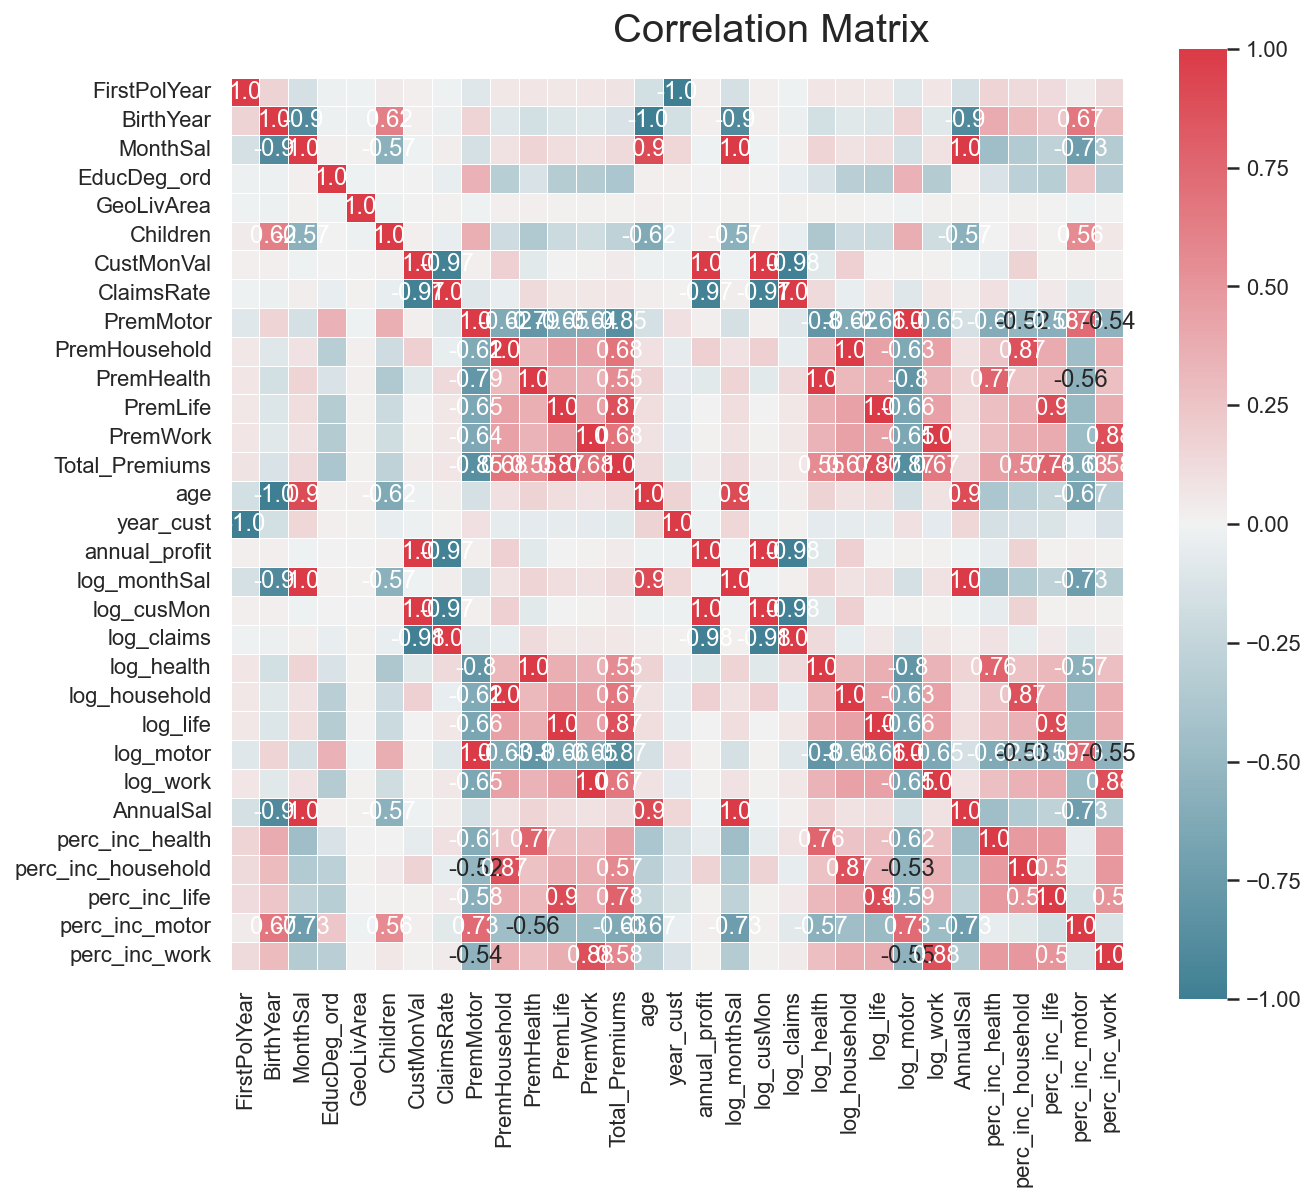

In [257]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data.corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()